Cloning into 'CompVisionAssignment'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 75 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 15.17 MiB | 27.25 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/CompVisionAssignment


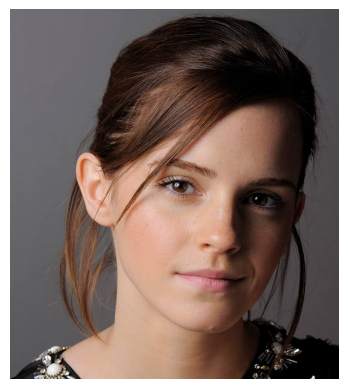

In [2]:
!git clone https://github.com/piumixit/CompVisionAssignment

%cd CompVisionAssignment

from PIL import Image
import matplotlib.pyplot as plt

image_path = 'image/emma.jpg'
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

101
50
105
256


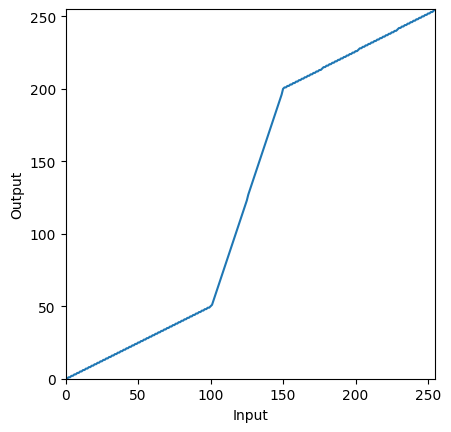

Text(0.5, 1.0, 'Transformed Image')

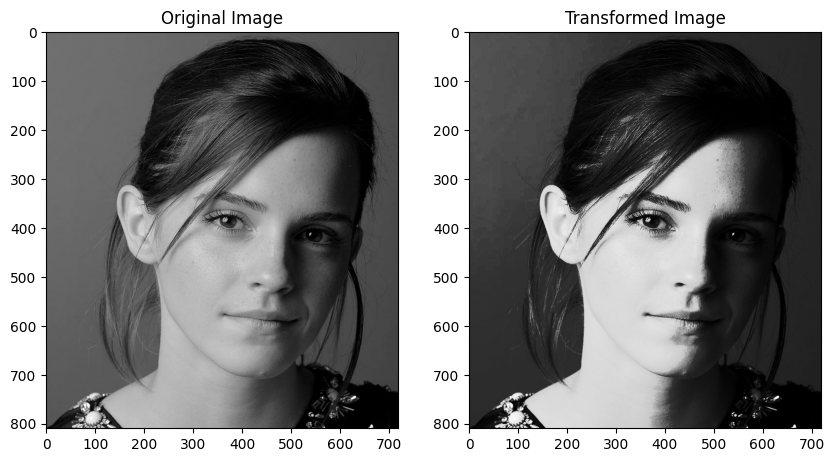

In [3]:
import cv2
import numpy as np

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img = cv2.imread('image/emma.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
  print(f"Error: Could not load image at {img}")

out = cv2.LUT(img, transform)
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(out, cmap='gray')
ax[1].set_title('Transformed Image')

2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

/tmp/ipython-input-3968742479.py:51: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


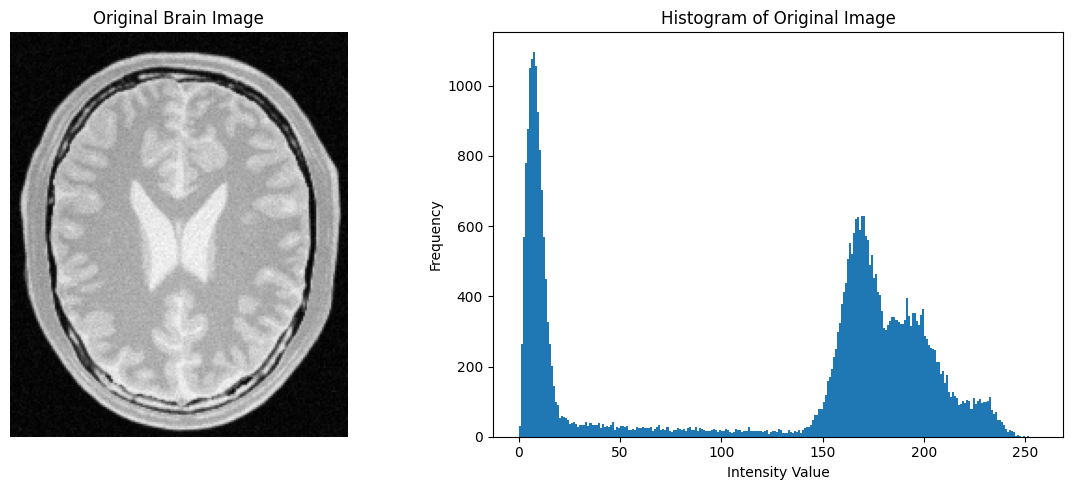

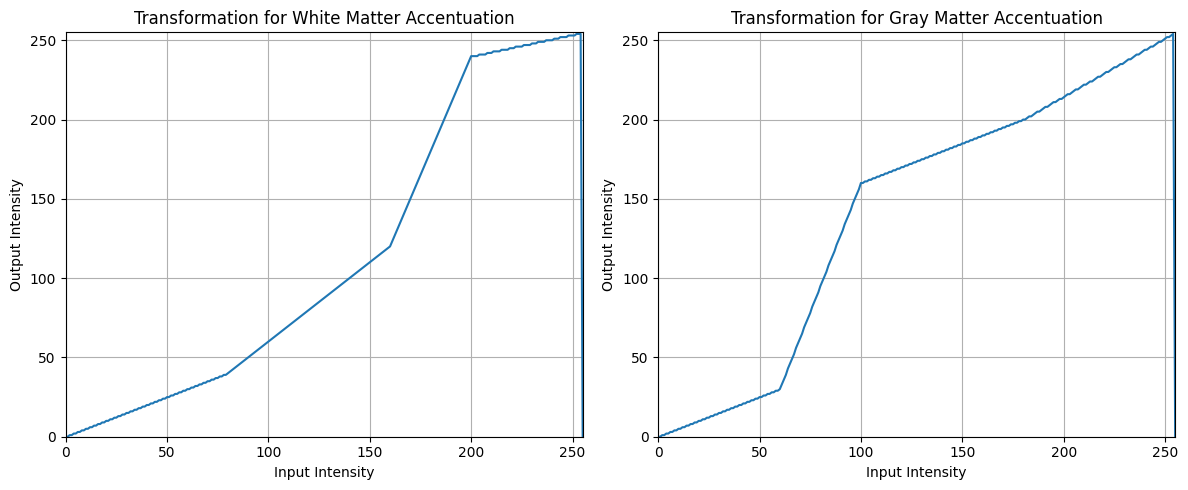

/tmp/ipython-input-3968742479.py:151: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[0, 1].hist(white_matter_img.ravel(), 256, [0, 256])
/tmp/ipython-input-3968742479.py:161: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1, 1].hist(gray_matter_img.ravel(), 256, [0, 256])


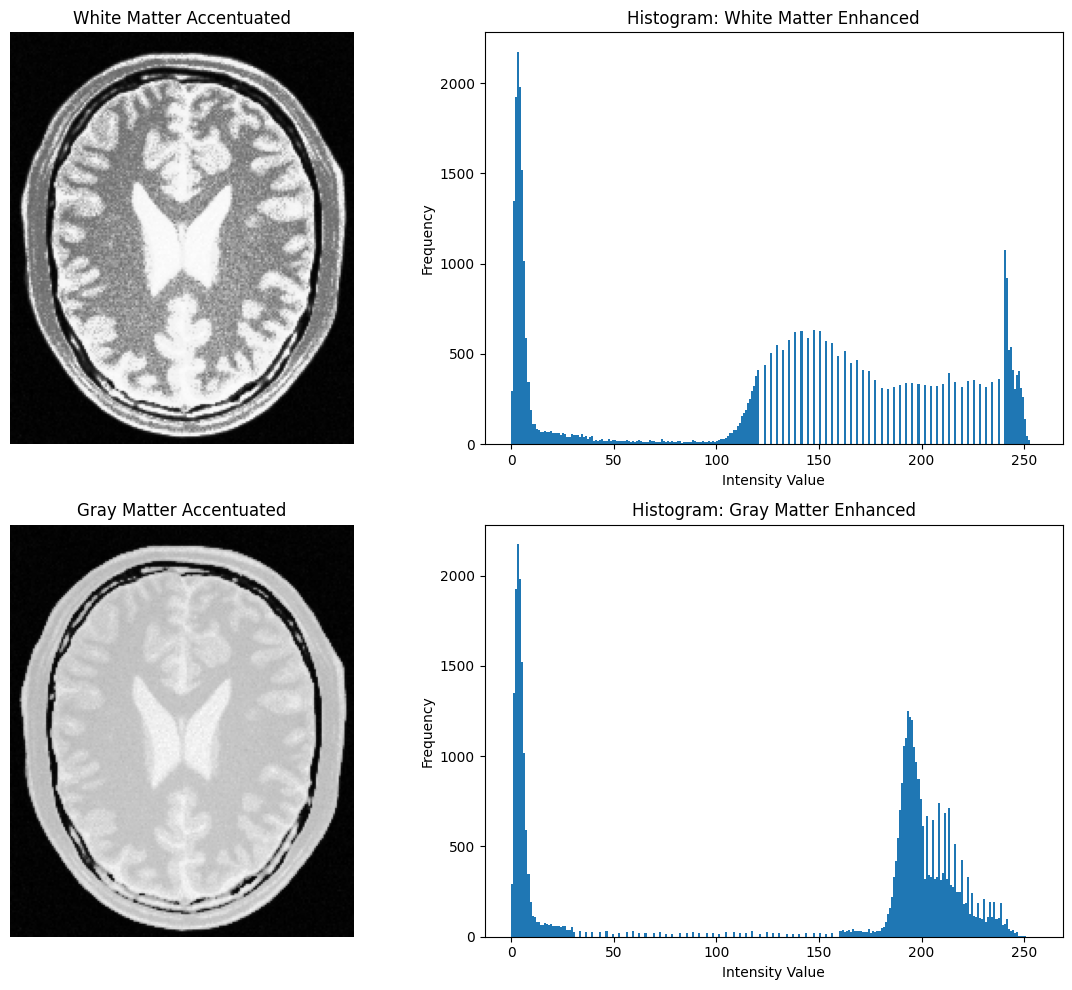

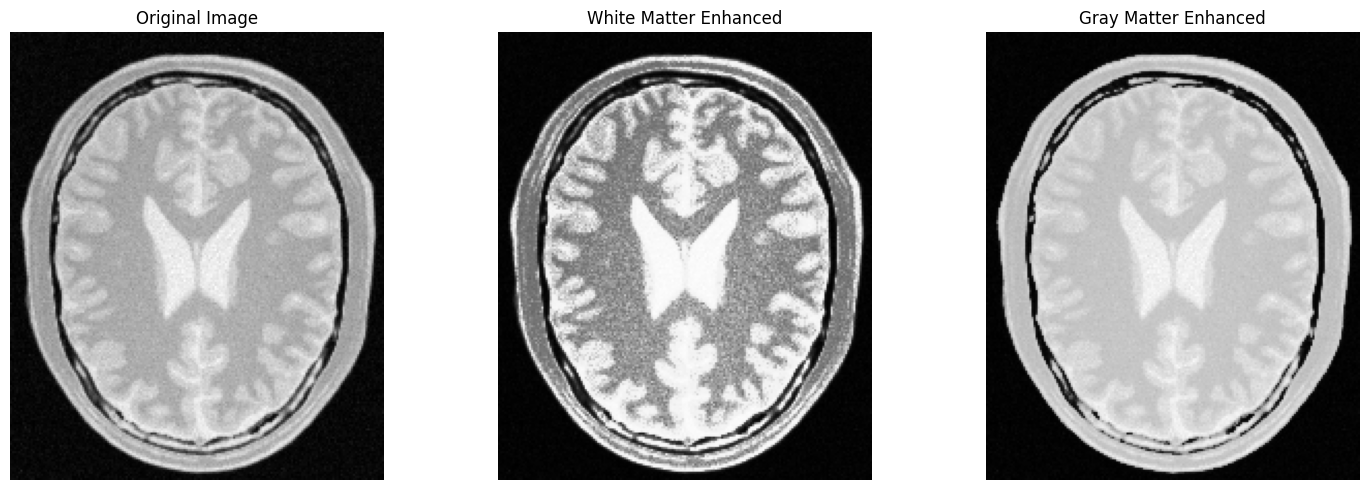

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a sample brain proton density image if not available
def create_sample_brain_image():
    # Create a synthetic brain-like image with different tissue types
    img = np.zeros((300, 300), dtype=np.uint8)

    # Create background
    img += np.random.normal(30, 5, (300, 300)).astype(np.uint8)

    # Create brain outline (ellipse)
    cv2.ellipse(img, (150, 150), (120, 100), 0, 0, 360, 80, -1)

    # Add ventricles (darker regions)
    cv2.ellipse(img, (150, 150), (40, 30), 0, 0, 360, 40, -1)
    cv2.ellipse(img, (100, 120), (20, 15), 0, 0, 360, 40, -1)
    cv2.ellipse(img, (200, 120), (20, 15), 0, 0, 360, 40, -1)

    # Add white matter (brighter regions)
    cv2.ellipse(img, (150, 150), (70, 50), 0, 0, 360, 180, -1)
    cv2.ellipse(img, (150, 180), (50, 30), 0, 0, 360, 180, -1)

    # Add gray matter (medium intensity)
    cv2.ellipse(img, (150, 150), (90, 70), 0, 0, 360, 120, -1)
    cv2.ellipse(img, (150, 180), (70, 50), 0, 0, 360, 120, -1)

    # Add some noise to make it more realistic
    noise = np.random.normal(0, 5, (300, 300)).astype(np.uint8)
    img = cv2.add(img, noise)

    return img

# Load or create the brain image
img_path = 'image/brain_proton_density_slice.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Creating sample brain proton density image for demonstration")
    img = create_sample_brain_image()

# Display original image and its histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Function to create piecewise linear transformation
def create_piecewise_transform(control_points):
    # Sort control points by x value
    control_points = control_points[control_points[:, 0].argsort()]

    # Initialize transformation array
    transform = np.zeros(256, dtype=np.uint8)

    # Add starting point (0,0)
    if control_points[0, 0] > 0:
        x_vals = np.array([0, control_points[0, 0]])
        y_vals = np.array([0, control_points[0, 1]])
        transform[0:control_points[0, 0]] = np.interp(
            np.arange(0, control_points[0, 0]), x_vals, y_vals)

    # Process each segment
    for i in range(len(control_points) - 1):
        x_start, y_start = control_points[i]
        x_end, y_end = control_points[i + 1]

        transform[x_start:x_end] = np.interp(
            np.arange(x_start, x_end),
            [x_start, x_end],
            [y_start, y_end]
        ).astype(np.uint8)

    # Add ending point (255,255)
    if control_points[-1, 0] < 255:
        x_vals = np.array([control_points[-1, 0], 255])
        y_vals = np.array([control_points[-1, 1], 255])
        transform[control_points[-1, 0]:256] = np.interp(
            np.arange(control_points[-1, 0], 256), x_vals, y_vals).astype(np.uint8)

    return transform

# Transformation to accentuate WHITE MATTER (brighter regions)
# This transformation will enhance bright pixels and compress darker ones
white_matter_points = np.array([
    [0, 0],        # Dark areas remain dark
    [80, 40],      # Compress gray matter range
    [160, 120],    # Slight enhancement of brighter grays
    [200, 240],    # Significant enhancement of white matter
    [255, 255]     # Maximum white stays white
])

white_matter_transform = create_piecewise_transform(white_matter_points)
white_matter_img = cv2.LUT(img, white_matter_transform)

# Transformation to accentuate GRAY MATTER (medium intensity regions)
# This transformation will enhance medium intensity pixels
gray_matter_points = np.array([
    [0, 0],        # Dark areas remain dark
    [60, 30],      # Compress dark gray range
    [100, 160],    # Significant enhancement of gray matter
    [180, 200],    # Slight compression of white matter
    [255, 255]     # Maximum white stays white
])

gray_matter_transform = create_piecewise_transform(gray_matter_points)
gray_matter_img = cv2.LUT(img, gray_matter_transform)

# Plot the transformation functions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(white_matter_transform)
plt.title('Transformation for White Matter Accentuation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(1, 2, 2)
plt.plot(gray_matter_transform)
plt.title('Transformation for Gray Matter Accentuation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.tight_layout()
plt.show()

# Display the results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# White matter results
axes[0, 0].imshow(white_matter_img, cmap='gray')
axes[0, 0].set_title('White Matter Accentuated')
axes[0, 0].axis('off')

axes[0, 1].hist(white_matter_img.ravel(), 256, [0, 256])
axes[0, 1].set_title('Histogram: White Matter Enhanced')
axes[0, 1].set_xlabel('Intensity Value')
axes[0, 1].set_ylabel('Frequency')

# Gray matter results
axes[1, 0].imshow(gray_matter_img, cmap='gray')
axes[1, 0].set_title('Gray Matter Accentuated')
axes[1, 0].axis('off')

axes[1, 1].hist(gray_matter_img.ravel(), 256, [0, 256])
axes[1, 1].set_title('Histogram: Gray Matter Enhanced')
axes[1, 1].set_xlabel('Intensity Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compare all images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_matter_img, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_img, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.tight_layout()
plt.show()

3. Consider the image shown in Fig. 31.
(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.
(b) Show the histograms of the original and corrected images

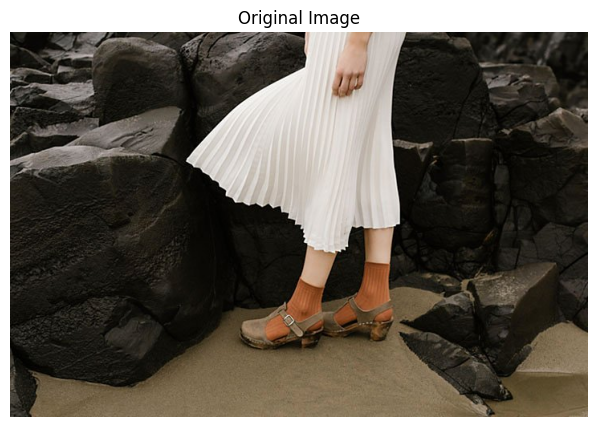

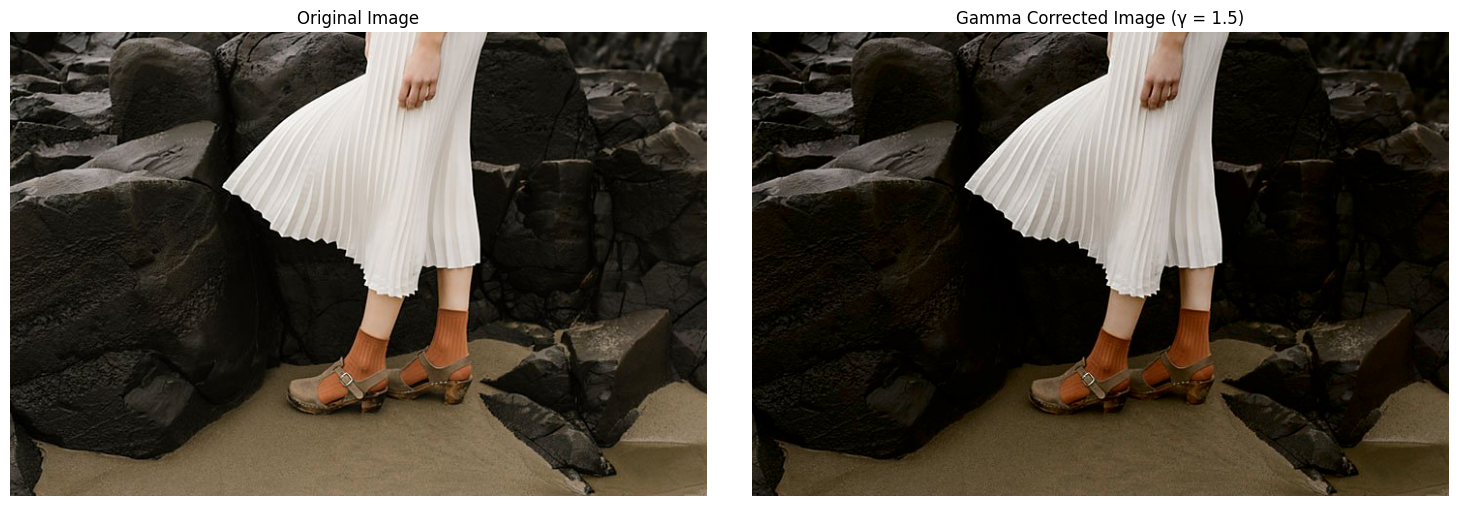

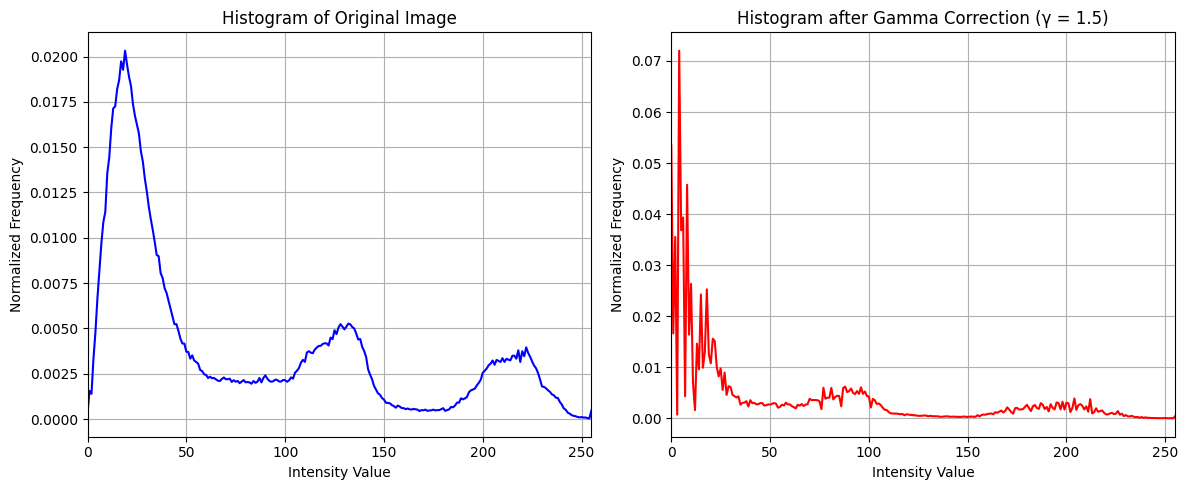

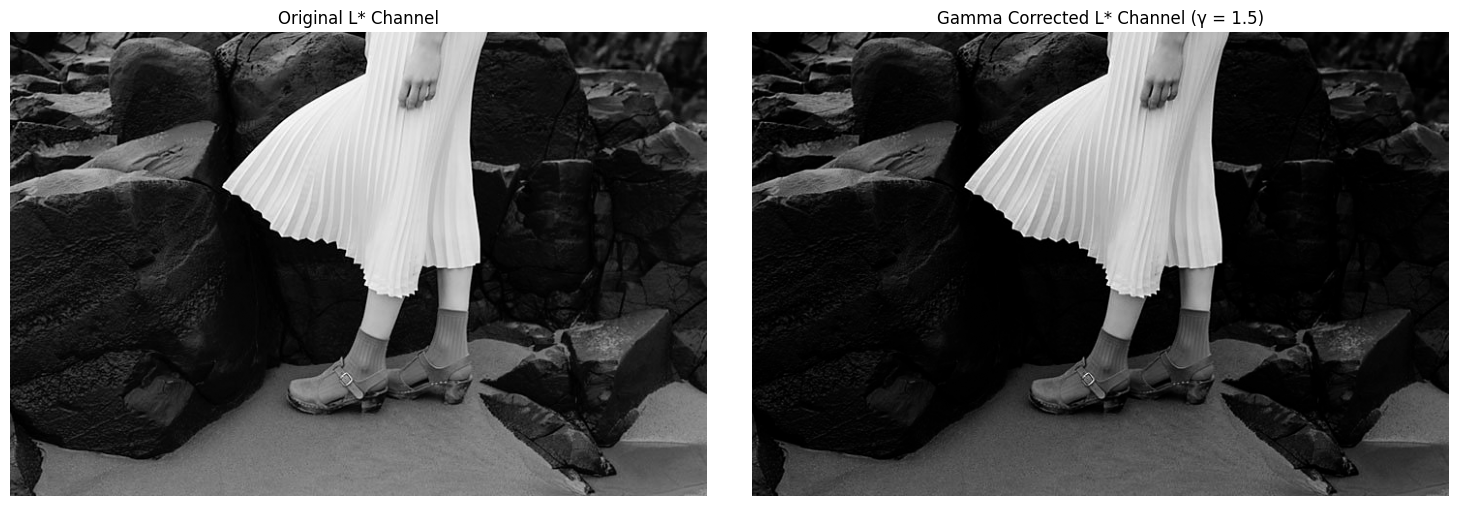

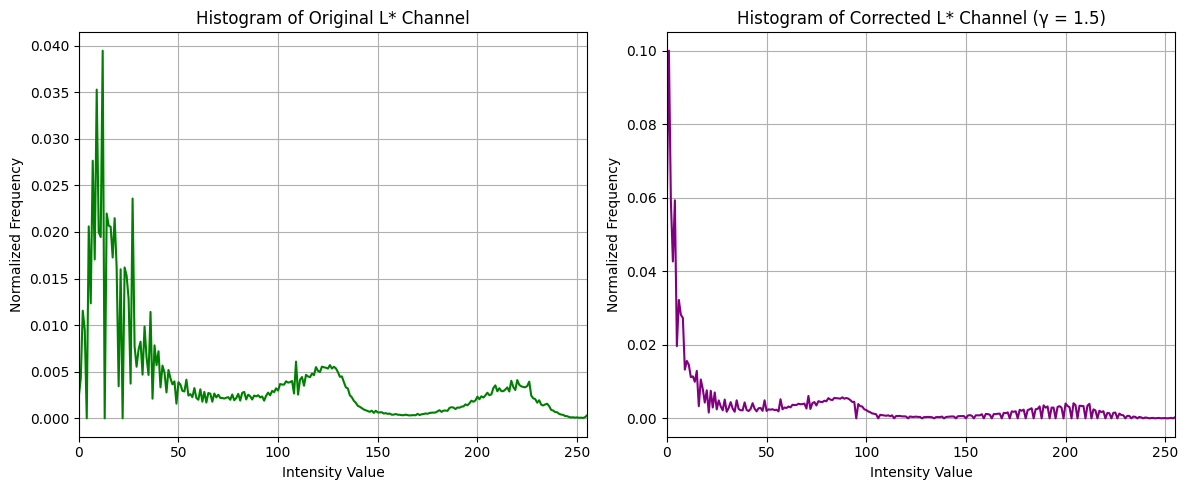

Applied gamma correction with γ = 1.5
Gamma correction formula: Output = Input^γ
For γ > 1 (like 1.5), the image becomes darker (reduces brightness)
For γ < 1, the image becomes brighter (increases brightness)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a sample image if not available
def create_sample_image():
    # Create a synthetic image with various colors and intensities
    img = np.zeros((300, 400, 3), dtype=np.uint8)

    # Add gradient background
    for i in range(300):
        for j in range(400):
            img[i, j] = [j//1.5, i//1.5, (i+j)//3]

    # Add some colored rectangles
    cv2.rectangle(img, (50, 50), (150, 100), (255, 0, 0), -1)     # Red
    cv2.rectangle(img, (200, 50), (300, 100), (0, 255, 0), -1)    # Green
    cv2.rectangle(img, (50, 150), (150, 200), (0, 0, 255), -1)    # Blue
    cv2.rectangle(img, (200, 150), (300, 200), (255, 255, 0), -1) # Cyan
    cv2.rectangle(img, (50, 250), (150, 300), (255, 0, 255), -1)  # Magenta
    cv2.rectangle(img, (200, 250), (300, 300), (0, 255, 255), -1) # Yellow

    # Add some text
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'Gamma Correction', (100, 30), font, 0.7, (255, 255, 255), 2)

    return img

# Load or create the image
img_path = 'image/highlights_and_shadows.jpg'
img = cv2.imread(img_path)

if img is None:
    print("Creating sample image for demonstration")
    img = create_sample_image()
else:
    # Convert from BGR to RGB for display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert to L*a*b* color space
lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

# Split into L*, a*, and b* channels
L, a, b = cv2.split(lab_img)

# Normalize L* channel to [0, 1] range for gamma correction
L_normalized = L.astype(np.float32) / 255.0

# Apply gamma correction to L* channel
gamma = 1.5  # Gamma value - you can adjust this
L_corrected = np.power(L_normalized, gamma)

# Scale back to [0, 255] range and convert to uint8
L_corrected = (L_corrected * 255).astype(np.uint8)

# Merge corrected L* channel with original a* and b* channels
lab_corrected = cv2.merge([L_corrected, a, b])

# Convert back to RGB color space
corrected_img = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2RGB)

# Display original and corrected images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(corrected_img)
axes[1].set_title(f'Gamma Corrected Image (γ = {gamma})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Calculate histograms
# For the original image
original_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
original_hist = original_hist / original_hist.sum()  # Normalize

# For the corrected image
corrected_hist = cv2.calcHist([corrected_img], [0], None, [256], [0, 256])
corrected_hist = corrected_hist / corrected_hist.sum()  # Normalize

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(original_hist, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(corrected_hist, color='red')
plt.title(f'Histogram after Gamma Correction (γ = {gamma})')
plt.xlabel('Intensity Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.tight_layout()
plt.show()

# Display L* channel before and after correction
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(L, cmap='gray')
axes[0].set_title('Original L* Channel')
axes[0].axis('off')

axes[1].imshow(L_corrected, cmap='gray')
axes[1].set_title(f'Gamma Corrected L* Channel (γ = {gamma})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Calculate and display histograms of L* channel
L_hist = cv2.calcHist([L], [0], None, [256], [0, 256])
L_hist = L_hist / L_hist.sum()  # Normalize

L_corrected_hist = cv2.calcHist([L_corrected], [0], None, [256], [0, 256])
L_corrected_hist = L_corrected_hist / L_corrected_hist.sum()  # Normalize

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(L_hist, color='green')
plt.title('Histogram of Original L* Channel')
plt.xlabel('Intensity Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(L_corrected_hist, color='purple')
plt.title(f'Histogram of Corrected L* Channel (γ = {gamma})')
plt.xlabel('Intensity Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the gamma value used
print(f"Applied gamma correction with γ = {gamma}")
print("Gamma correction formula: Output = Input^γ")
print(f"For γ > 1 (like {gamma}), the image becomes darker (reduces brightness)")
print("For γ < 1, the image becomes brighter (increases brightness)")

4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation

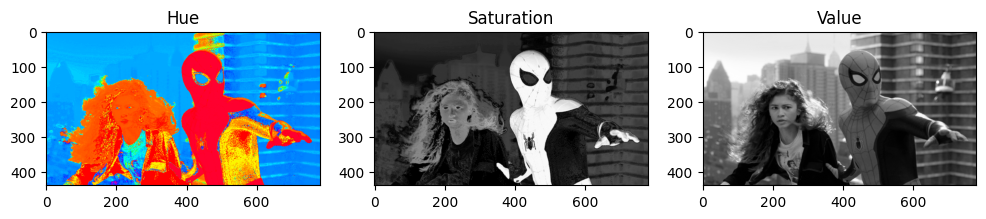

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image/spider.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(h, cmap="hsv"); plt.title("Hue")
plt.subplot(132); plt.imshow(s, cmap="gray"); plt.title("Saturation")
plt.subplot(133); plt.imshow(v, cmap="gray"); plt.title("Value")
plt.show()


In [5]:
sigma = 70
a = 0.6

x = np.arange(256)
transformation = np.minimum(x + a * 128 * np.exp(-((x-128)**2)/(2*sigma**2)), 255).astype(np.uint8)


s_transformed = cv2.LUT(s, transformation)

hsv_enhanced = cv2.merge([h, s_transformed, v])
img_vibrant = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2RGB)



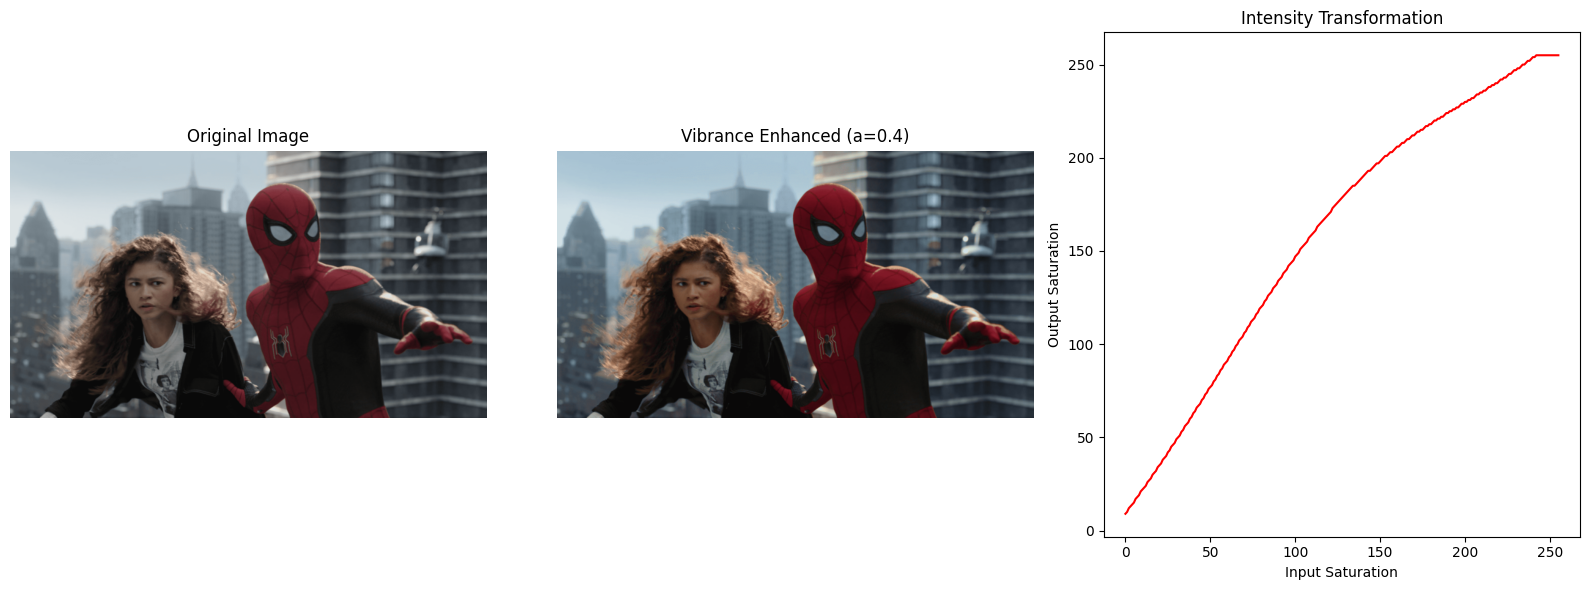

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image/spider.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

sigma = 70
a = 0.4

x = np.arange(256)
transformation = np.minimum(
    x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255
).astype(np.uint8)

s_transformed = cv2.LUT(s, transformation)

hsv_enhanced = cv2.merge([h, s_transformed, v])
img_vibrant = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(16,6))

plt.subplot(131); plt.imshow(img_rgb); plt.title("Original Image"); plt.axis("off")
plt.subplot(132); plt.imshow(img_vibrant); plt.title(f"Vibrance Enhanced (a={a})"); plt.axis("off")
plt.subplot(133); plt.plot(x, transformation, color="red");
plt.title("Intensity Transformation");
plt.xlabel("Input Saturation"); plt.ylabel("Output Saturation")

plt.tight_layout()
plt.show()
